Chapter 15

# 度矩阵
《线性代数》 | 鸢尾花书：数学不难

这段代码从图论的角度出发，借助 `networkx` 库构建了一个无向图，并计算了该图的**邻接矩阵**与**度矩阵**。下面我们从数学视角详细解读这段代码的核心思想与数学含义，适合配合线性代数和图论课程理解图结构的代数表示。

---

首先定义的邻接矩阵为：

$$
A = \begin{bmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0
\end{bmatrix}
$$

$A_{ij}$ 表示节点 $i$ 与节点 $j$ 是否连接；如果连接则为 1，否则为 0。由于该图是**无向图**，邻接矩阵满足对称性：$A = A^T$。

---

然后通过 `nx.Graph(adjacency_matrix)` 将这个邻接矩阵转换成一个无向图对象，并通过 `nx.relabel_nodes` 将原本的节点 0, 1, 2, 3 映射为更具可读性的标签 'a', 'b', 'c', 'd'。这一步没有数学计算，但有利于理解节点之间的关系。

---

接下来定义的 `pos` 是节点在平面上的位置，用于可视化绘图。通过 `nx.draw_networkx` 展示图结构，用户可以从图形直观看到每对相邻节点之间是否存在边连接。

---

接下来的核心部分是计算邻接矩阵和度矩阵。

再次从 `undirected_G` 得到邻接矩阵 $A$（其实和之前定义的是一样的），用 `.toarray()` 得到 NumPy 格式。然后构造了一个全为 1 的列向量：

$$
\mathbf{1} = \begin{bmatrix}1 \\ 1 \\ 1 \\ 1\end{bmatrix}
$$

这个列向量是计算节点度数（degree）的关键工具：

- $A \cdot \mathbf{1}$ 代表每一行的元素和，即每个节点的度（连接的边数）：
  $$
  A \cdot \mathbf{1} = \begin{bmatrix}
  3 \\
  2 \\
  3 \\
  2
  \end{bmatrix}
  $$

- $\mathbf{1}^T \cdot A$ 是对称的，也就是每列的和（也表示节点的度），因为 $A$ 是对称矩阵，所以这两个结果相同。

---

然后用 `np.diag` 把每个节点的度放到对角线构造**度矩阵** $D$：

$$
D = \begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 2
\end{bmatrix}
$$

这个矩阵在图论中非常重要，因为它结合邻接矩阵可以用来定义**图拉普拉斯矩阵**：

$$
L = D - A
$$

图拉普拉斯矩阵 $L$ 在**图的连通性、谱聚类、图信号处理**等领域有重要作用。虽然本段代码没有显式计算 $L$，但度矩阵和邻接矩阵的准备已经为其铺平了道路。

---

最后的 `D_ = np.diag(A.sum(axis = 1))` 是另一种写法，也构造了度矩阵。由于 $A$ 是对称的，按行求和和按列求和是一样的，所以 $D$ 和 $D_$ 是相同的矩阵。

---

综上，这段代码完整地展示了如何从图的结构出发，用线性代数中的矩阵形式表示图的拓扑特征，并通过计算邻接矩阵与度矩阵，为后续图论中的谱分析、路径分析和聚类分析等打下数学基础。

## 初始化

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 定义邻接矩阵

In [6]:
adjacency_matrix = np.array([[0, 1, 1, 1],
                             [1, 0, 1, 0],
                             [1, 1, 0, 1],
                             [1, 0, 1, 0]])

## 创建无向图

In [8]:
undirected_G = nx.Graph(adjacency_matrix, nodetype=int)
# 用邻接矩阵创建无向图

# 构造节点映射
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# 重命名节点
undirected_G = nx.relabel_nodes(undirected_G, mapping)

## 定义节点坐标

In [10]:
pos = {'a':[0, 0], 
       'b':[1, 0],
       'c':[1, 1],
       'd':[0, 1]}

## 可视化

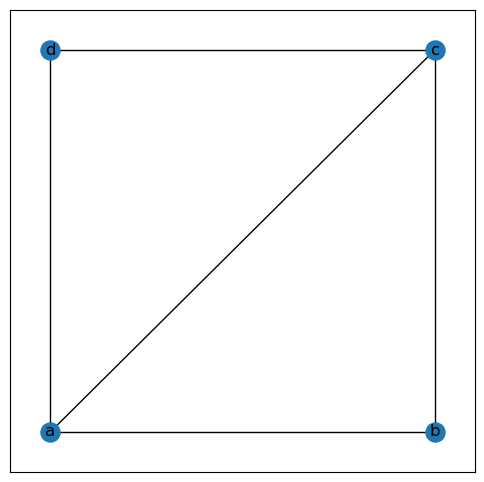

In [12]:
plt.figure(figsize = (6,6))
nx.draw_networkx(undirected_G, pos = pos, node_size = 188, with_labels=True)

## 再算邻接矩阵

In [14]:
A = nx.adjacency_matrix(undirected_G).toarray()

In [34]:
A @ A

array([[3, 1, 2, 1],
       [1, 2, 1, 2],
       [2, 1, 3, 1],
       [1, 2, 1, 2]])

## 度矩阵

In [16]:
All_1s = np.ones((4,1))
All_1s

array([[1.],
       [1.],
       [1.],
       [1.]])

In [17]:
All_1s.T @ A

array([[3., 2., 3., 2.]])

In [18]:
A @ All_1s

array([[3.],
       [2.],
       [3.],
       [2.]])

In [19]:
nodes = list(undirected_G.nodes())
degrees = [undirected_G.degree(n) for n in nodes]

# 构造度矩阵
D = np.diag(degrees)
D

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 2]])

In [20]:
D = np.diag(A.sum(axis = 0))
D

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 2]])

In [21]:
D = np.diag(A.sum(axis = 1))
D

array([[3, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 2]])

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  